In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import LassoCV

In [4]:
df=pd.read_csv("A:\Dataset\Hitters.csv")
df

<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
C:\Users\astik\AppData\Local\Temp\ipykernel_9372\983036269.py:1: SyntaxWarning: invalid escape sequence '\D'
  df=pd.read_csv("A:\Dataset\Hitters.csv")


,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497,127,7,65,48,37,5,2703,806,32,379,311,138,N,E,325,9,3,700.0,N
318,492,136,5,76,50,94,12,5511,1511,39,897,451,875,A,E,313,381,20,875.0,A
319,475,126,3,61,43,52,6,1700,433,7,217,93,146,A,W,37,113,7,385.0,A
320,573,144,9,85,60,78,8,3198,857,97,470,420,332,A,E,1314,131,12,960.0,A


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      322 non-null    int64  
 1   Hits       322 non-null    int64  
 2   HmRun      322 non-null    int64  
 3   Runs       322 non-null    int64  
 4   RBI        322 non-null    int64  
 5   Walks      322 non-null    int64  
 6   Years      322 non-null    int64  
 7   CAtBat     322 non-null    int64  
 8   CHits      322 non-null    int64  
 9   CHmRun     322 non-null    int64  
 10  CRuns      322 non-null    int64  
 11  CRBI       322 non-null    int64  
 12  CWalks     322 non-null    int64  
 13  League     322 non-null    object 
 14  Division   322 non-null    object 
 15  PutOuts    322 non-null    int64  
 16  Assists    322 non-null    int64  
 17  Errors     322 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  322 non-null    object 
dtypes: float64

In [10]:
df.isna().sum()

AtBat         0
Hits          0
HmRun         0
Runs          0
RBI           0
Walks         0
Years         0
CAtBat        0
CHits         0
CHmRun        0
CRuns         0
CRBI          0
CWalks        0
League        0
Division      0
PutOuts       0
Assists       0
Errors        0
Salary       59
NewLeague     0
dtype: int64

In [8]:
df['Salary'].fillna(df['Salary'].median(skipna=True),inplace=True)
df.isna().sum()

C:\Users\astik\AppData\Local\Temp\ipykernel_9372\1218454702.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Salary'].fillna(df['Salary'].median(skipna=True),inplace=True)


AtBat        0
Hits         0
HmRun        0
Runs         0
RBI          0
Walks        0
Years        0
CAtBat       0
CHits        0
CHmRun       0
CRuns        0
CRBI         0
CWalks       0
League       0
Division     0
PutOuts      0
Assists      0
Errors       0
Salary       0
NewLeague    0
dtype: int64

In [10]:
dv=pd.get_dummies(df[['League','Division','NewLeague']],drop_first=True)

In [12]:
dv

,League_N,Division_W,NewLeague_N
0,False,False,False
1,True,True,True
2,False,True,False
3,True,False,True
4,True,False,True
...,...,...,...
317,True,False,True
318,False,False,False
319,False,True,False
320,False,False,False


In [16]:
y=df['Salary']
x=df.drop(['League','Division','NewLeague','Salary'],axis=1,inplace=True)
X=pd.concat([x,dv[['League_N','Division_W','NewLeague_N']]],axis=1)

In [18]:
df

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors
0,293,66,1,30,29,14,1,293,66,1,30,29,14,446,33,20
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497,127,7,65,48,37,5,2703,806,32,379,311,138,325,9,3
318,492,136,5,76,50,94,12,5511,1511,39,897,451,875,313,381,20
319,475,126,3,61,43,52,6,1700,433,7,217,93,146,37,113,7
320,573,144,9,85,60,78,8,3198,857,97,470,420,332,1314,131,12


In [20]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [22]:
lasso_model=Lasso().fit(X_train,y_train)
lasso_model.intercept_

580.1895427438301

In [24]:
lasso_model.coef_

array([ -0.        , -95.35322359, -11.91228549])

In [26]:
y_pred=lasso_model.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

396.5087283430486

In [28]:
r2_score(y_test,y_pred)

0.04814024962079244

In [30]:
lasso_cv_model=LassoCV(alphas=np.random.randint(0,100,56),cv=10,max_iter=100,n_jobs=-1).fit(X_train,y_train)

In [32]:
lasso_cv_model

LassoCV(alphas=array([26,  7, 99, 95, 76, 88, 52, 94, 26, 89,  8, 11, 56, 12, 16, 49, 10,
       73, 52, 77, 40, 68, 82, 20, 16, 29, 16,  5, 61, 37, 30, 44, 84, 10,
        5, 82, 52, 16, 30, 94, 15,  4, 72, 97, 88, 76, 85, 34,  6, 35, 31,
       82, 37,  4, 57, 21]),
        cv=10, max_iter=100, n_jobs=-1)

In [34]:
lasso_cv_model.alpha_

10

In [36]:
lasso_new=Lasso().set_params(alpha=16).fit(X_train,y_train)
y_pred_new=lasso_new.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred_new))

402.8769974816561

In [38]:
pd.Series(lasso_new.coef_,index=X_train.columns)

League_N       -0.000000
Division_W    -35.064617
NewLeague_N    -0.000000
dtype: float64

In [40]:
pd.Series(lasso_new.coef_,index=X_test.columns)

League_N       -0.000000
Division_W    -35.064617
NewLeague_N    -0.000000
dtype: float64

In [42]:
df.describe()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors
count,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.00000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000
mean,380.928571,101.024845,10.770186,50.909938,48.027950,38.742236,7.444099,2648.68323,717.571429,69.490683,358.795031,330.118012,260.239130,288.937888,106.913043,8.040373
std,153.404981,46.454741,8.709037,26.024095,26.166895,21.639327,4.926087,2324.20587,654.472627,86.266061,334.105886,333.219617,267.058085,280.704614,136.854876,6.368359
min,16.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,19.00000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,255.250000,64.000000,4.000000,30.250000,28.000000,22.000000,4.000000,816.75000,209.000000,14.000000,100.250000,88.750000,67.250000,109.250000,7.000000,3.000000
50%,379.500000,96.000000,8.000000,48.000000,44.000000,35.000000,6.000000,1928.00000,508.000000,37.500000,247.000000,220.500000,170.500000,212.000000,39.500000,6.000000
75%,512.000000,137.000000,16.000000,69.000000,64.750000,53.000000,11.000000,3924.25000,1059.250000,90.000000,526.250000,426.250000,339.250000,325.000000,166.000000,11.000000
max,687.000000,238.000000,40.000000,130.000000,121.000000,105.000000,24.000000,14053.00000,4256.000000,548.000000,2165.000000,1659.000000,1566.000000,1378.000000,492.000000,32.000000


<Axes: xlabel='PutOuts', ylabel='Errors'>

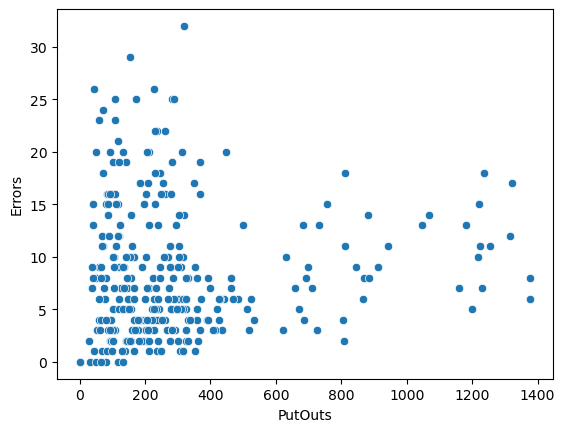

In [44]:
sns.scatterplot(x='PutOuts',y='Errors',data=df)

<Axes: xlabel='Years', ylabel='Assists'>

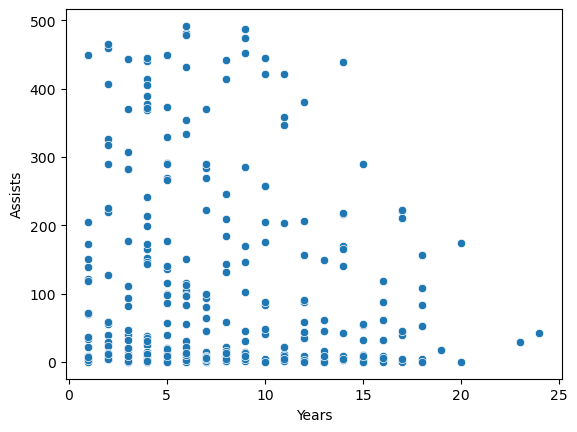

In [46]:
sns.scatterplot(x='Years',y='Assists',data=df)

<Axes: xlabel='AtBat', ylabel='CAtBat'>

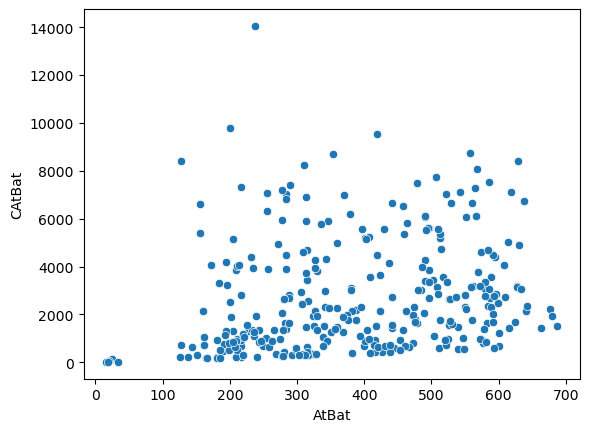

In [48]:
sns.scatterplot(x='AtBat',y='CAtBat',data=df)

<Axes: xlabel='Hits', ylabel='CHits'>

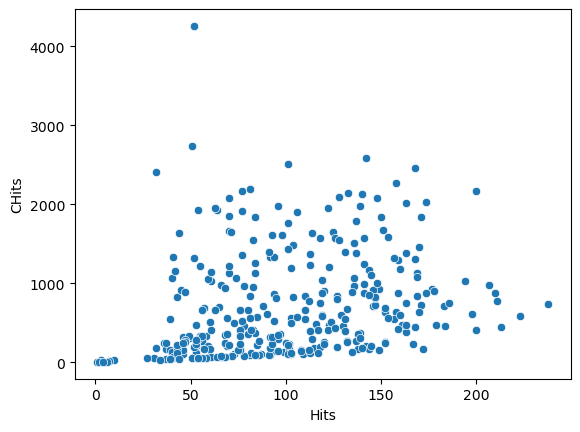

In [50]:
sns.scatterplot(x='Hits',y='CHits',data=df)

<Axes: xlabel='HmRun', ylabel='CHmRun'>

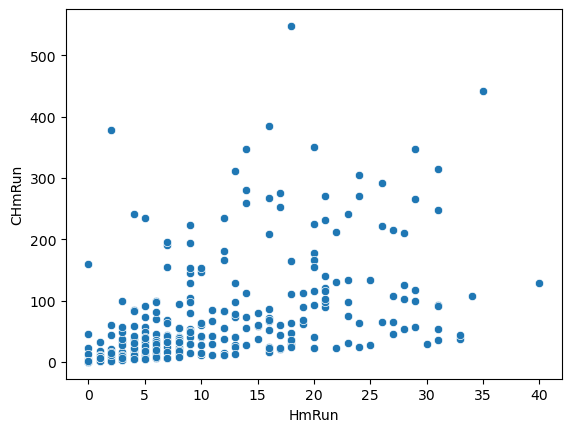

In [52]:
sns.scatterplot(x='HmRun',y='CHmRun',data=df)

<Axes: xlabel='Runs', ylabel='CRuns'>

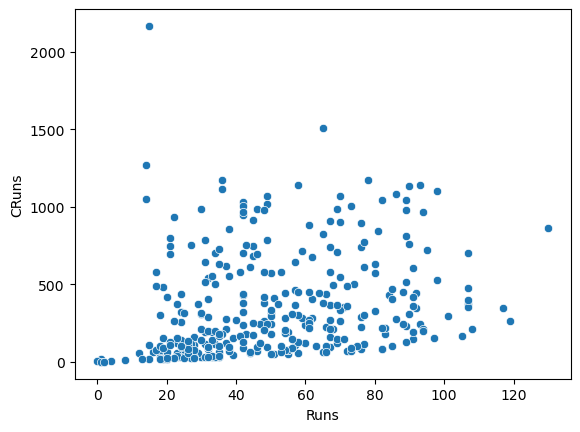

In [54]:
sns.scatterplot(x='Runs',y='CRuns',data=df)

<Axes: xlabel='RBI', ylabel='CRBI'>

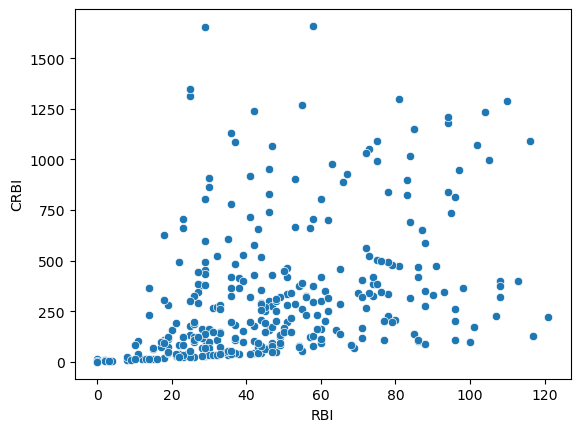

In [58]:
sns.scatterplot(x='RBI',y='CRBI',data=df)

<Axes: xlabel='Walks', ylabel='CWalks'>

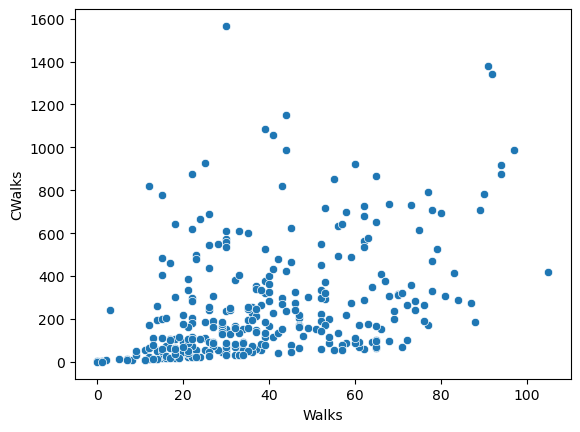

In [60]:
sns.scatterplot(x='Walks',y='CWalks',data=df)

<Axes: ylabel='Density'>

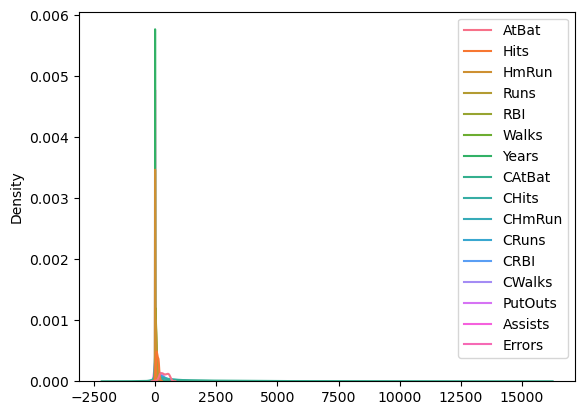

In [62]:
sns.kdeplot(df)

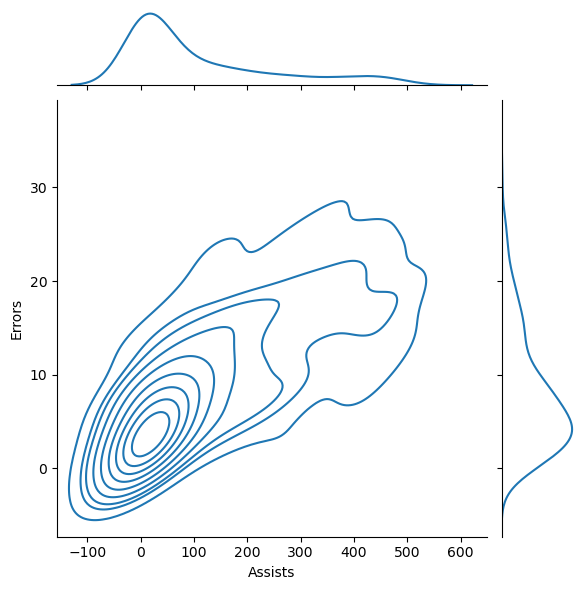

In [64]:
sns.jointplot(x='Assists',y='Errors',data=df,kind='kde')

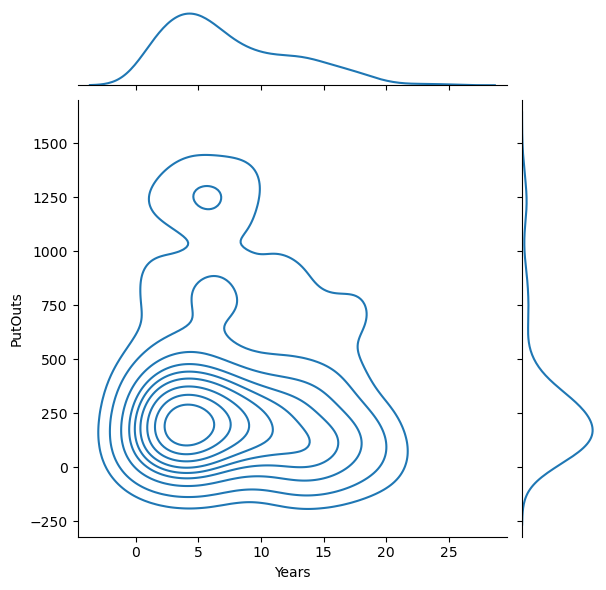

In [66]:
sns.jointplot(x='Years',y='PutOuts',data=df,kind='kde')

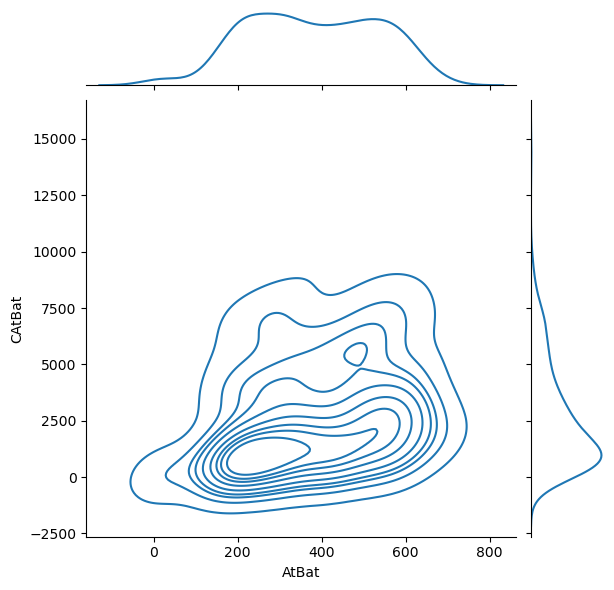

In [68]:
sns.jointplot(x='AtBat',y='CAtBat',data=df,kind='kde')

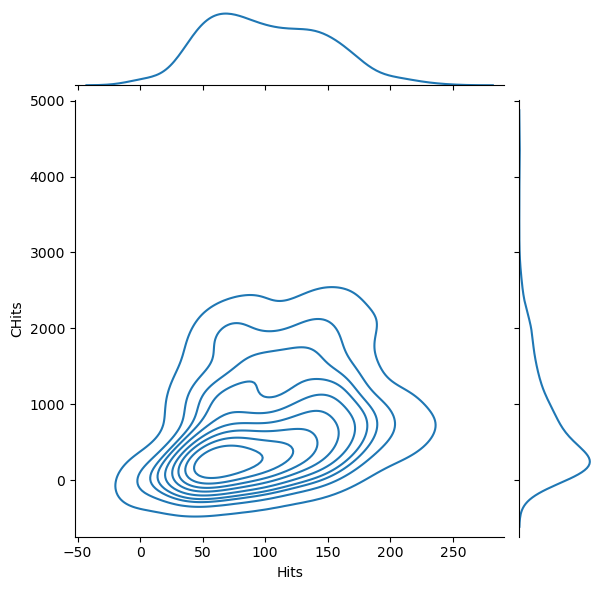

In [70]:
sns.jointplot(x='Hits',y='CHits',data=df,kind='kde')

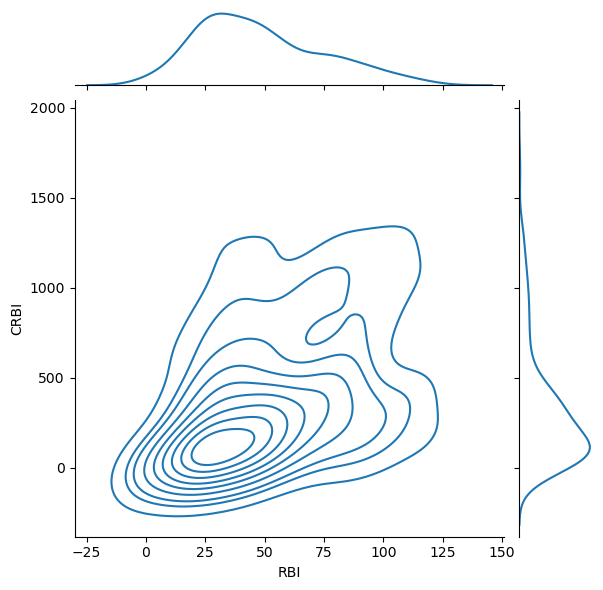

In [72]:
sns.jointplot(x='RBI',y='CRBI',data=df,kind='kde')

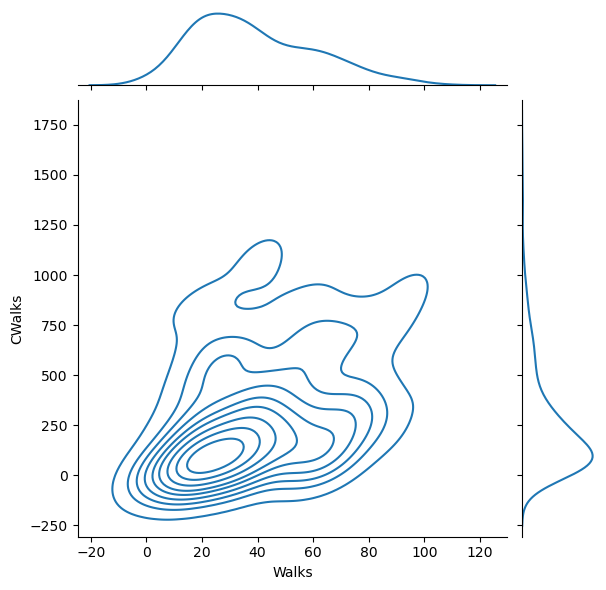

In [74]:
sns.jointplot(x='Walks',y='CWalks',data=df,kind='kde')

At this graph we get to know that in minimal points the most frequency score is high and in maximal points the least frequency score is low.